<a href="https://colab.research.google.com/github/CSpanias/ml_training/blob/master/DecisionTreeClassifier_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classifier Algorithm**

*This notebook was developed for Decision Tree practice and the resulting code is a blend of various different resources.*

Based mostly on:
* [SoloLearn Courses (ML Path)](https://www.sololearn.com/learning/1094)



# **CONTENT**

1. [Data Cleaning](#DataCleaning)
2. [KFold Cross-Validation with different criterion (gini, entropy)](#KFold)
3. [Decision Tree Visualization (GraphViz)](#GraphViz)
4. [Pruning the Decision Tree](#Pruning)
  * [Pre-Pruning](#Pre-Pruning)
  * [Post-Pruning](#Post-Pruning)
5. [Conclusions](#Conclusions)


In [2]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
# make a list of headers for the dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
    'age', 'label']

# import pandas so we can import the file
import pandas as pd

# read the CSV file, ignore the top row, and use the above headers
df = pd.read_csv('https://raw.githubusercontent.com/CSpanias/ml_training/master/diabetes.csv',
                 skiprows = 1, names=col_names)

# print the first 5 rows of data
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# print info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# check how many target classes there are
print(df['label'].unique())

[1 0]


<a name="DataCleaning"> </a>
# **Data Cleaning**

* Missing values
* Duplicate rows

In [7]:
# check for missing values
df.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

<a name='KFold'> </a>
 # **KFold Cross Validation with different criterion** (gini, entropy)

Import the required libraries & methods.

In [9]:
import numpy as np # convert DataFrame to arrays, calculate means
from sklearn.tree import DecisionTreeClassifier # algorithm required
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import KFold # perform a KFold Cross-Validation
from sklearn.metrics import accuracy_score, precision_score, recall_score # evaluation metrics

1. Assign Xs (features) & y (target) 
2. Convert them from pandas DataFrame (matrix) and pandas Series (single column) to ***numpy 2- and 1-Dimensional numpy arrays***, respectively.

  Pandas DataFrames & Series are easier to read by a human, but numpy's arrays are ***easier to handled by the computer***.  

In [10]:
"""
instead of writing all column names:

X = df['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
        'pedigree', 'age']

we are selecting all variables and drop the target/y variable. 

The result is the same.
"""
# from df drop the specified variable, axis=1: drop the whole column
X = df.drop(columns='label', axis=1)
# convert pandas dataframe to a 2-Dimensional numpy array
X = X.values
# confirm that X's shape is 2D
print(X.shape)

# assing target
y = df['label']
# convert pandas series to a 1-Dimensional numpy array
y = y.values
# confirm that y's shape is 1D
print(y.shape)

(768, 8)
(768,)


Perform KFold Cross-Validation to compare the mean accuracy of:
1. A Decision Tree model with gini as the criterion.
2. A Decision Tree model with entropy as the criterion.

In [11]:
# define the number of splits (train/test sets) and shuffle rows
kf = KFold(n_splits=5, shuffle=True)

# we want to cross-validate the model with both gini and entropy
for criterion in ['gini', 'entropy']:
  # {} = placeholders, .format(x) = put x in the placeholders
  print("Decision Tree - {}" .format(criterion))
  # create an empty list of each metric so we can later 
  # store the score in it for each of the 5 splits
  accuracy = []
  precision = []
  recall = []

  # each split of X produces a training and testing set
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # select algorithm with the specified criterion
    model = DecisionTreeClassifier(criterion=criterion)
    # train the model using training data
    model.fit(X_train, y_train)
    # predict using the testing data
    y_pred = model.predict(X_test)
    # calculate and append accuracy score at the end of each list
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    
  # print a message while calculating the mean score of each metric
  # {:.4f} = format x to 4 decimal places, .format(x) = put x into the placeholder
  print("Accuracy: {:.4f}" .format(np.mean(accuracy)))
  print("Precision: {:.4f}" .format(np.mean(precision)))
  print("Recall: {:.4f}\n" .format(np.mean(recall)))

Decision Tree - gini
Accuracy: 0.7097
Precision: 0.5870
Recall: 0.6037

Decision Tree - entropy
Accuracy: 0.7213
Precision: 0.5963
Recall: 0.6156



Entropy seems to work better, hence, we will train our model using entropy as the criterion.

In [15]:
# select algorith and set entropy as the criterion
model = DecisionTreeClassifier(criterion='entropy')
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                    random_state=44)
# train the model using training data
model.fit(X_train, y_train)
# predict using the test data
y_pred_GS = model.predict(X_test)
# print accuracy, {} = placeholder, .format(x) = put x into the placeholder
print("Accuracy: {:.2f}" .format(accuracy_score(y_test, y_pred_GS)))

Accuracy: 0.73


<a name='GraphViz'> </a>
# **Decision Tree Visualization** (GraphViz)

Decision Trees benefits:
1. **Interpretability**: clarity of information representation, useful for explaining the prediction to a non-technical audience.
2. **Transparency**: can greatly help in the *decision making process*. 

*If you're going to run this on your computer, make sure to install graphviz first. You can do this by opening your command prompt and typing "**pip install graphviz**".*

Sample Visualization for easier interpretation of the process:

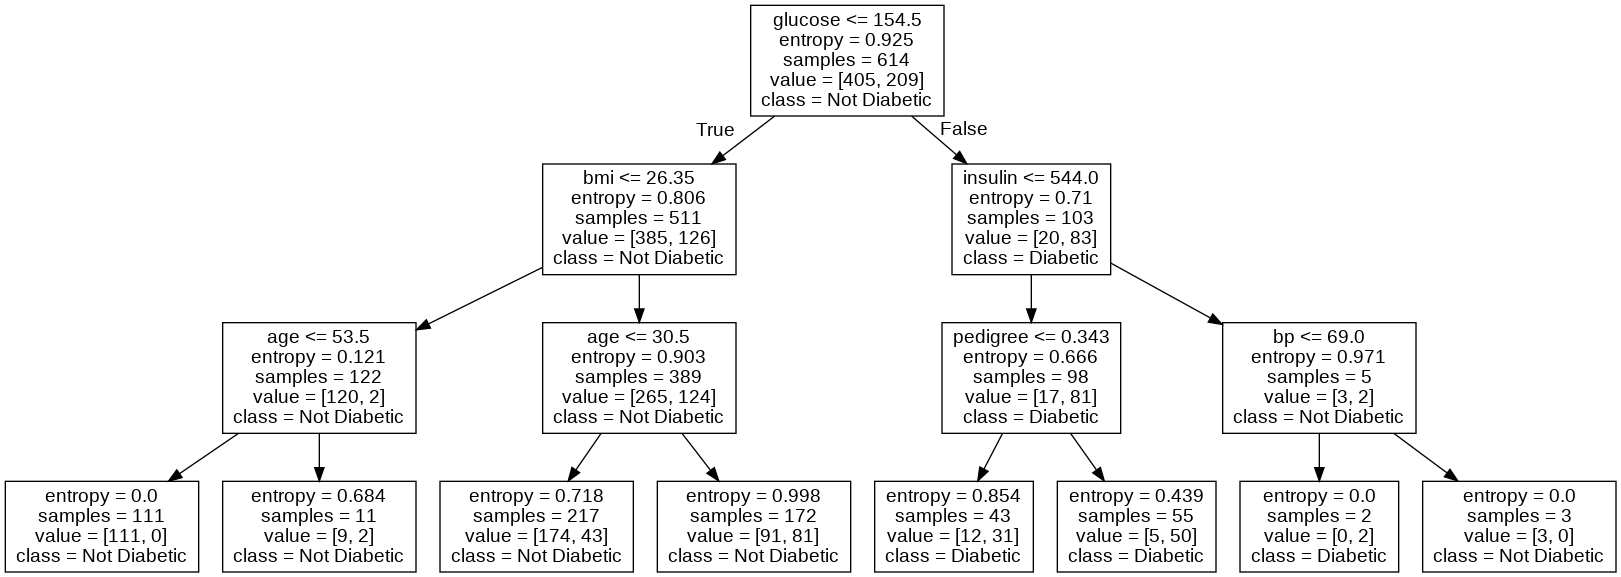

In [16]:
# a list with the feature names
feature_names= ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
                'pedigree', 'age']
# assign X and y variables
X = df[feature_names].values
y = df['label'].values
# split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=10)
# create the model with max_depth=3 (again) for rendering reasons
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
# train the model
model.fit(X_train, y_train)

# import export_graphviz
from sklearn.tree import export_graphviz
# export files as stored as .dot files
dot_file = export_graphviz(model, feature_names=feature_names,
                           class_names= ['Not Diabetic', 'Diabetic'])

# import graphviz to convert .dot file to a .png image
import graphviz
# read the dot_file
graph = graphviz.Source(dot_file)
# convert .dot to .png without generating additional files
graph.render(filename='tree_diabetes', format='png', cleanup=True)

# import IPython to display the rendered .png image
from IPython.display import Image
# display image using the path
Image(filename="/content/tree_diabetes.png")

<a name='Pruning'> </a>
# **Pruning the Decision Tree**
Removing the unnecessary elements from the Decision Trees with the aim of:
* Reducing the complexity to avoid overfitting
* Making it easier to interpret.



1. **Pre-Pruning**: the goal is to limit tree growth
  * ***max_depth***: grow up to a certain depth/height
  * ***min_samples_split***: the minimun number of samples required to split an internal node.
  * ***max_leaf_nodes***: limit the total number of leaf nodes allowed in the tree

    Additional info [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

2. **Post-pruning**: build the whole tree and then review the tree and decide which leaves to remove to make it smaller.

<a name='Pre-Pruning'> </a>
**Pre-Pruning** example:

Training Accuracy: 0.8306
Testing Accuracy: 0.7662


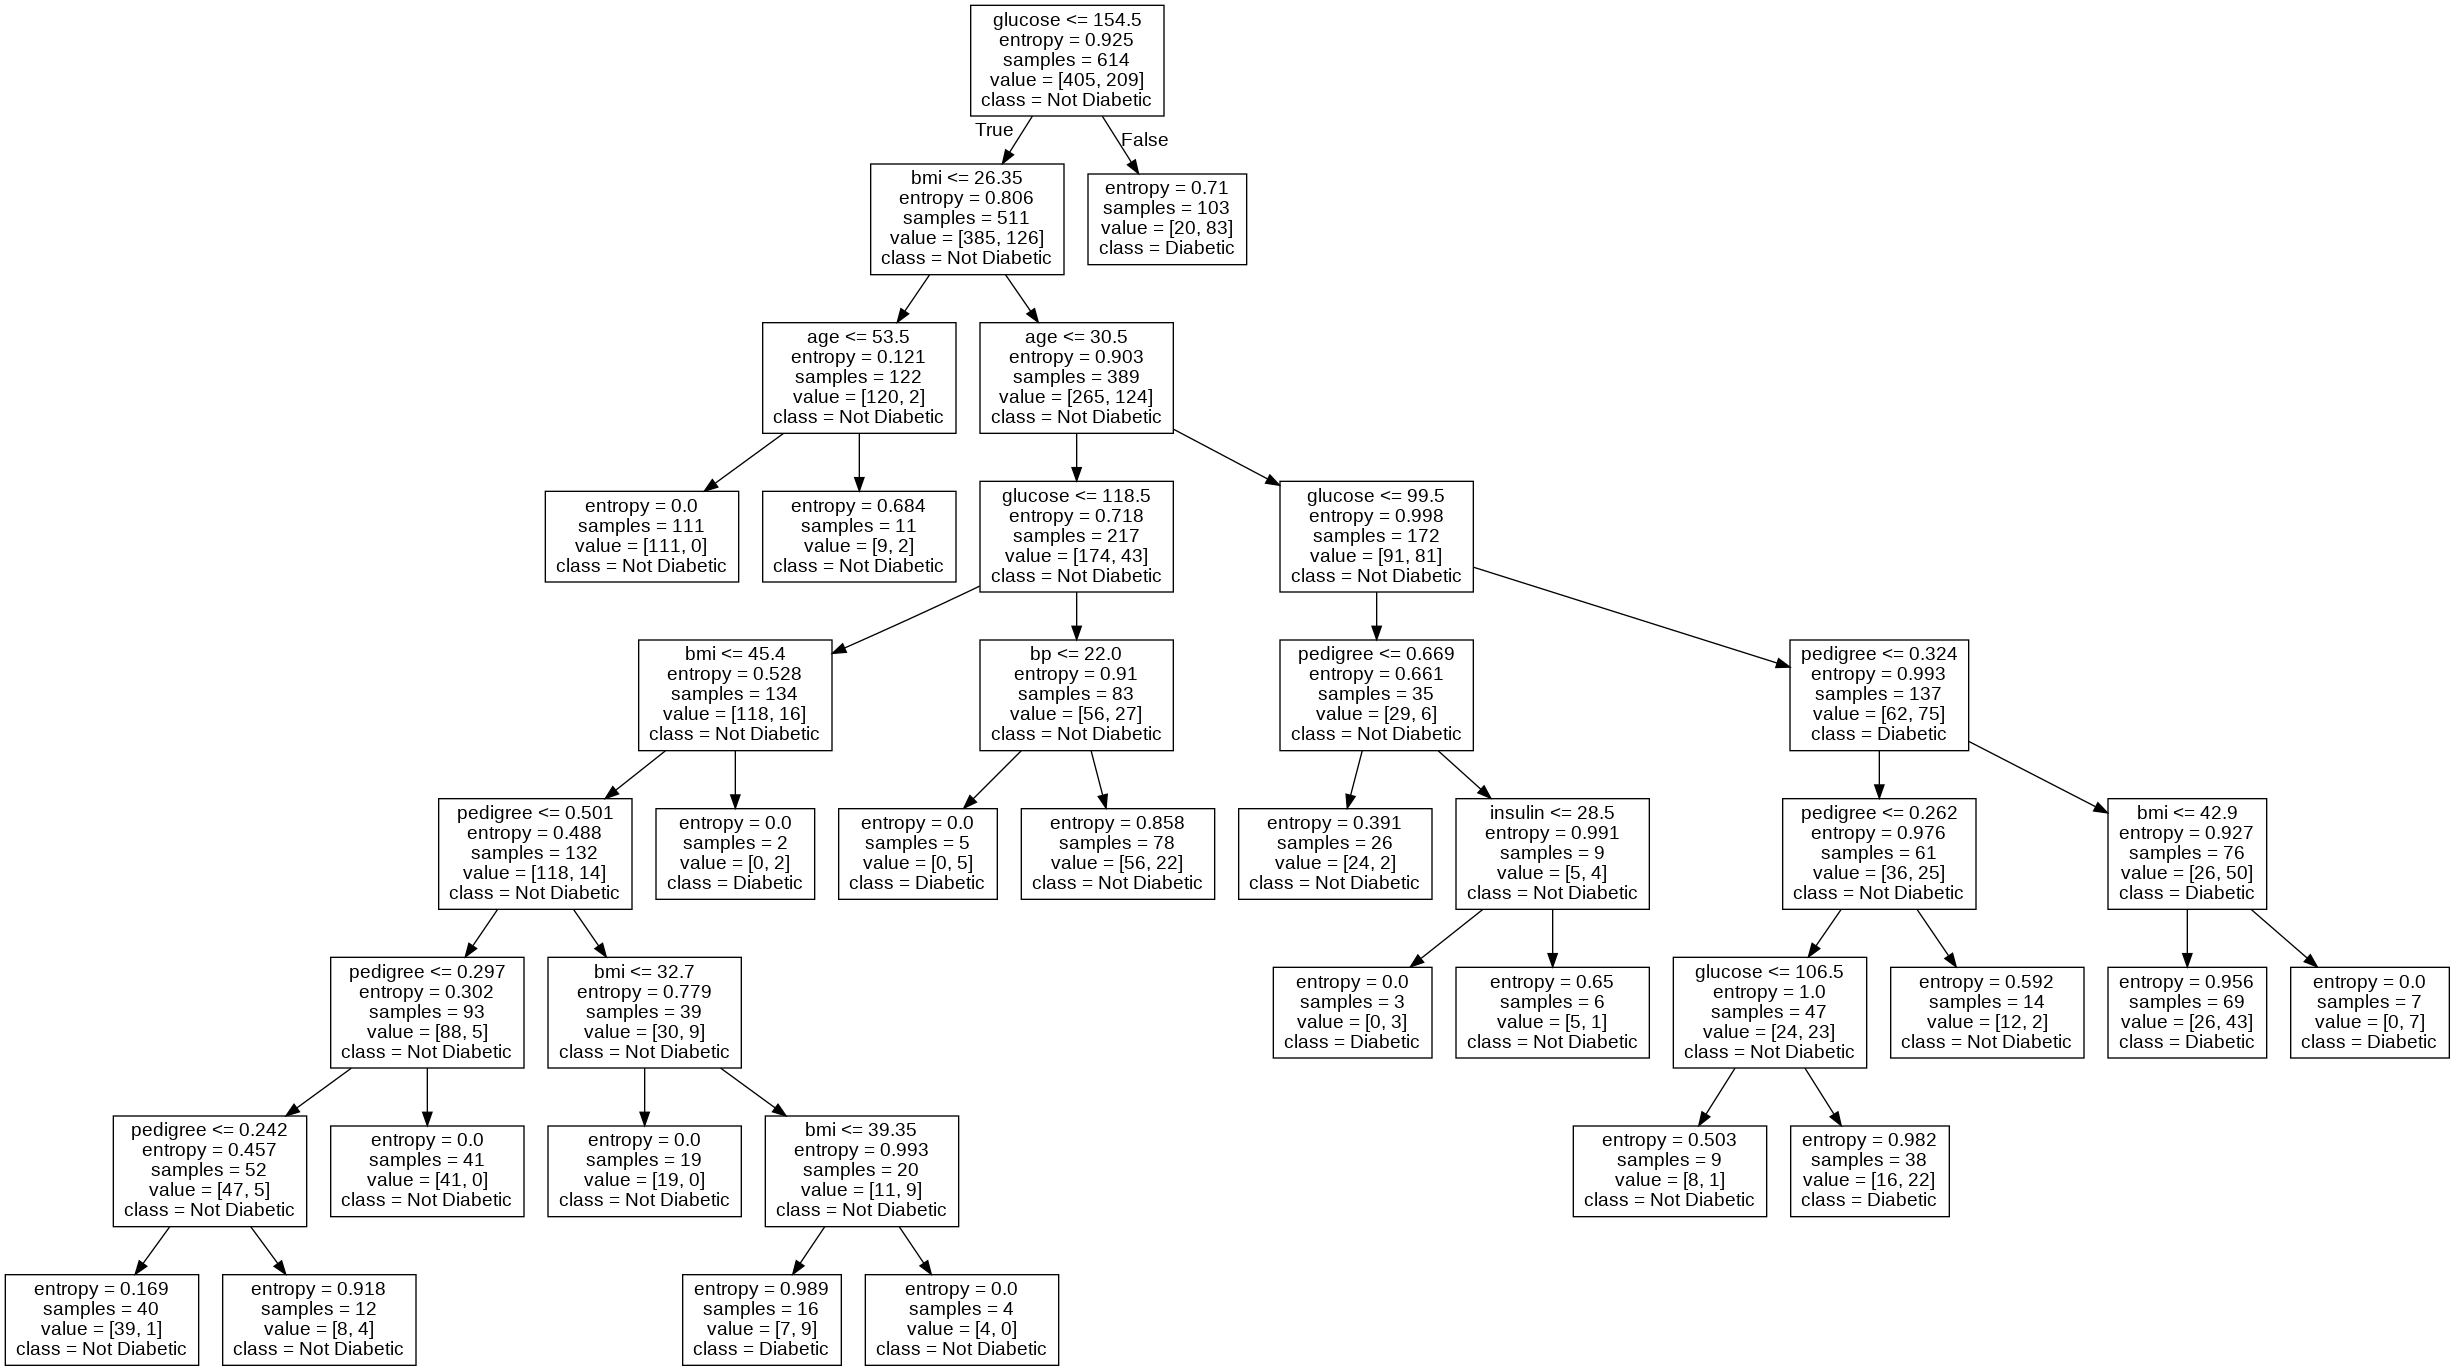

In [17]:
# create the model with modified parameters
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=10,
                               min_samples_split=4,
                               max_leaf_nodes=20,)

# train the model
model.fit(X_train, y_train)

# predict using the training data
y_pred_train = model.predict(X_train)
# predict using the test data
y_pred = model.predict(X_test)
# print accuracy
print("Training Accuracy: {:.4f}" .format(accuracy_score(y_train, y_pred_train)))
print("Testing Accuracy: {:.4f}" .format(accuracy_score(y_test, y_pred)))

# import export_graphviz
from sklearn.tree import export_graphviz
# export files as stored as .dot files
dot_file = export_graphviz(model, feature_names=feature_names,
                           class_names= ['Not Diabetic', 'Diabetic'])

# import graphviz to convert .dot file to a .png image
import graphviz
# read the dot_file
graph = graphviz.Source(dot_file)
# convert .dot to .png without generating additional files
graph.render(filename='tree_diabetes', format='png', cleanup=True)

# import IPython to display the rendered .png image
from IPython.display import Image
# display image using the path
Image(filename="/content/tree_diabetes.png")

Pre-Prunning successfully ***increased testing accuracy*** in comparison to the default model (77% vs. 73%)

<a name='Post-Pruning'> </a>
**Post-Pruning** example:  
(*the same tree as the default (first) model, recreated here with visualization*)

Training Accuracy: 1.0000
Testing Accuracy: 0.6948


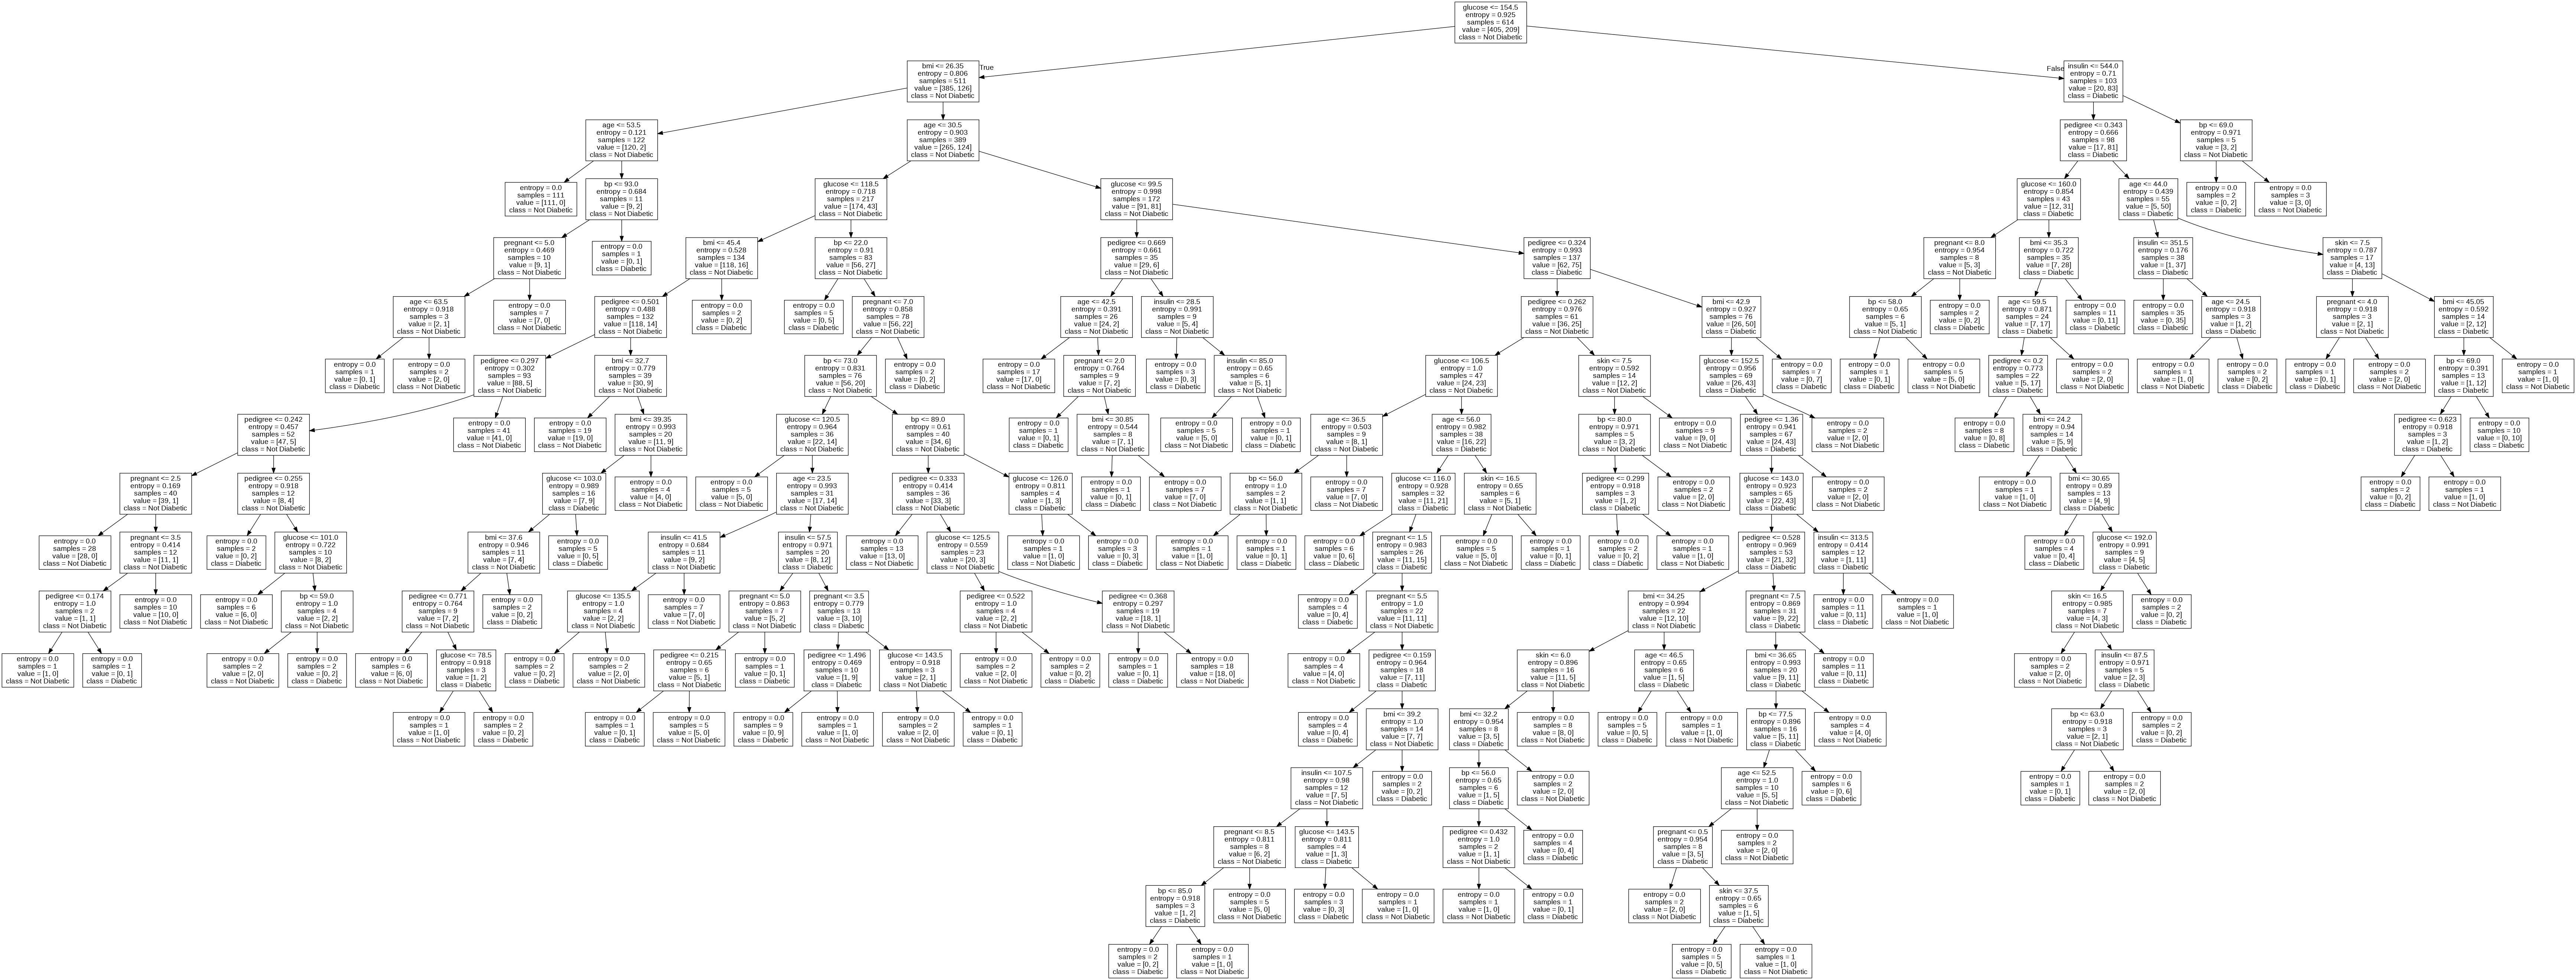

In [18]:
# create the model with modified parameters
model = DecisionTreeClassifier(criterion='entropy')

# train the model
model.fit(X_train, y_train)

# predict using the training data
y_pred_train = model.predict(X_train)
# predict using the test data
y_pred = model.predict(X_test)
# print accuracy
print("Training Accuracy: {:.4f}" .format(accuracy_score(y_train, y_pred_train)))
print("Testing Accuracy: {:.4f}" .format(accuracy_score(y_test, y_pred)))

# import export_graphviz
from sklearn.tree import export_graphviz
# export files as stored as .dot files
dot_file = export_graphviz(model, feature_names=feature_names,
                           class_names= ['Not Diabetic', 'Diabetic'])

# import graphviz to convert .dot file to a .png image
import graphviz
# read the dot_file
graph = graphviz.Source(dot_file)
# convert .dot to .png without generating additional files
graph.render(filename='tree_diabetes', format='png', cleanup=True)

# import IPython to display the rendered .png image
from IPython.display import Image
# display image using the path
Image(filename="/content/tree_diabetes.png")

***Testing accuracy dropped considerably*** in comparison with the Pre-Prunned tree (0.74 vs. 0.77).  

The full tree has now ***17 rows*** which results in an ***overfitting*** indication:  *the training accuracy score (100%) is much higher that the testing accuracy score (74%)*.

Notice that, for example, in the ***7th row*** entropy scores are quite good, so try and stop tree growth there and see what happens.

Training Accuracy: 0.8616
Testing Accuracy: 0.7597


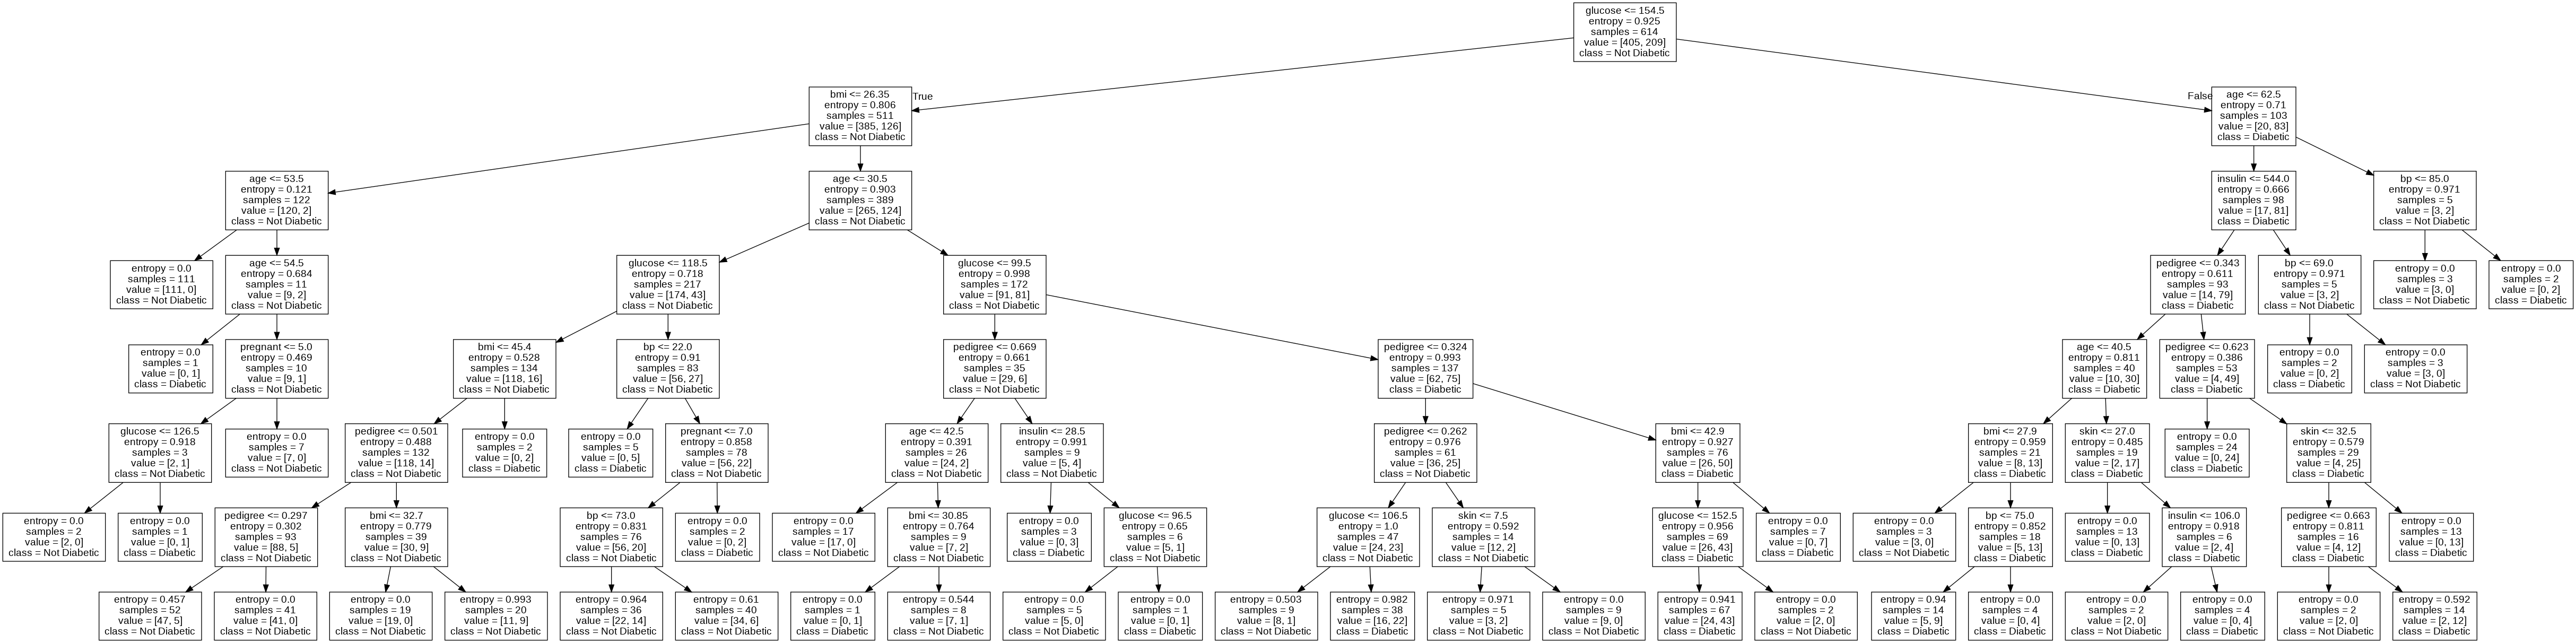

In [19]:
# create the model with modified parameters
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=7)

# train the model
model.fit(X_train, y_train)

# predict using the training data
y_pred_train = model.predict(X_train)
# predict using the test data
y_pred = model.predict(X_test)
# print accuracy
print("Training Accuracy: {:.4f}" .format(accuracy_score(y_train, y_pred_train)))
print("Testing Accuracy: {:.4f}" .format(accuracy_score(y_test, y_pred)))

# import export_graphviz
from sklearn.tree import export_graphviz
# export files as stored as .dot files
dot_file = export_graphviz(model, feature_names=feature_names,
                           class_names= ['Not Diabetic', 'Diabetic'])

# import graphviz to convert .dot file to a .png image
import graphviz
# read the dot_file
graph = graphviz.Source(dot_file)
# convert .dot to .png without generating additional files
graph.render(filename='tree_diabetes', format='png', cleanup=True)

# import IPython to display the rendered .png image
from IPython.display import Image
# display image using the path
Image(filename="/content/tree_diabetes.png")

***Testing accuracy score*** raised from ***73% to 76%*** with just the first modification.

<a name='Conclusions'> </a>
# **Conclusions**
1. **GraphViz** allows to easily generate a visual representation of the Decision Tree which greatly helps in its ***interpretability***!

2. **Pre-Pruning** and **Post-Pruning** techniques were both successful to considerably ***increase testing accuracy*** and ***minimize overfitting*** with minimal modifications!